## 题目：寻找关键用户和分析社交关系

### data.json 数据描述
#### 1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
#### 2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
- 节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
- 边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

### 问题
#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
 
#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

1. 社交网络构建与分析
a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络
{'Yanyan-Wang': [['Aarebecca', 25.3], ['pomelo-nwu', 25.09], ['yangzy0603', 11.85], ['tyn1998', 9.62], ['yvonneyx', 7.39], ['lidongze0629', 7.25], ['RackweLLizm', 4.5], ['yikenie', 4.25], ['yubo0923', 3.61], ['Maple0817', 3.11], ['wj23027', 2.34], ['frank-zsy', 2.1], ['andyhuang18', 1.14], ['bifenglin', 0.86]], 'Aarebecca': [['Yanyan-Wang', 25.3], ['pomelo-nwu', 24.84], ['yangzy0603', 11.92], ['yvonneyx', 7.73], ['lidongze0629', 6.58], ['tyn1998', 6.4], ['RackweLLizm', 4.84], ['yikenie', 4.55], ['yubo0923', 3.82], ['Maple0817', 3.27], ['frank-zsy', 0.97]], 'pomelo-nwu': [['Yanyan-Wang', 25.09], ['Aarebecca', 24.84], ['yangzy0603', 13.85], ['tyn1998', 12.48], ['lidongze0629', 8.1], ['yvonneyx', 7.63], ['RackweLLizm', 4.97], ['yikenie', 4.66], ['bifenglin', 4.11], ['frank-zsy', 3.96], ['yubo0923', 3.9], ['wj23027', 3.86], ['andyhuang18', 3.56], ['Maple0817', 3.32], ['will-ww', 3.27], ['zhicheng-ning', 2.52], ['PureNatural', 2.36], ['xiaoya-yaya', 

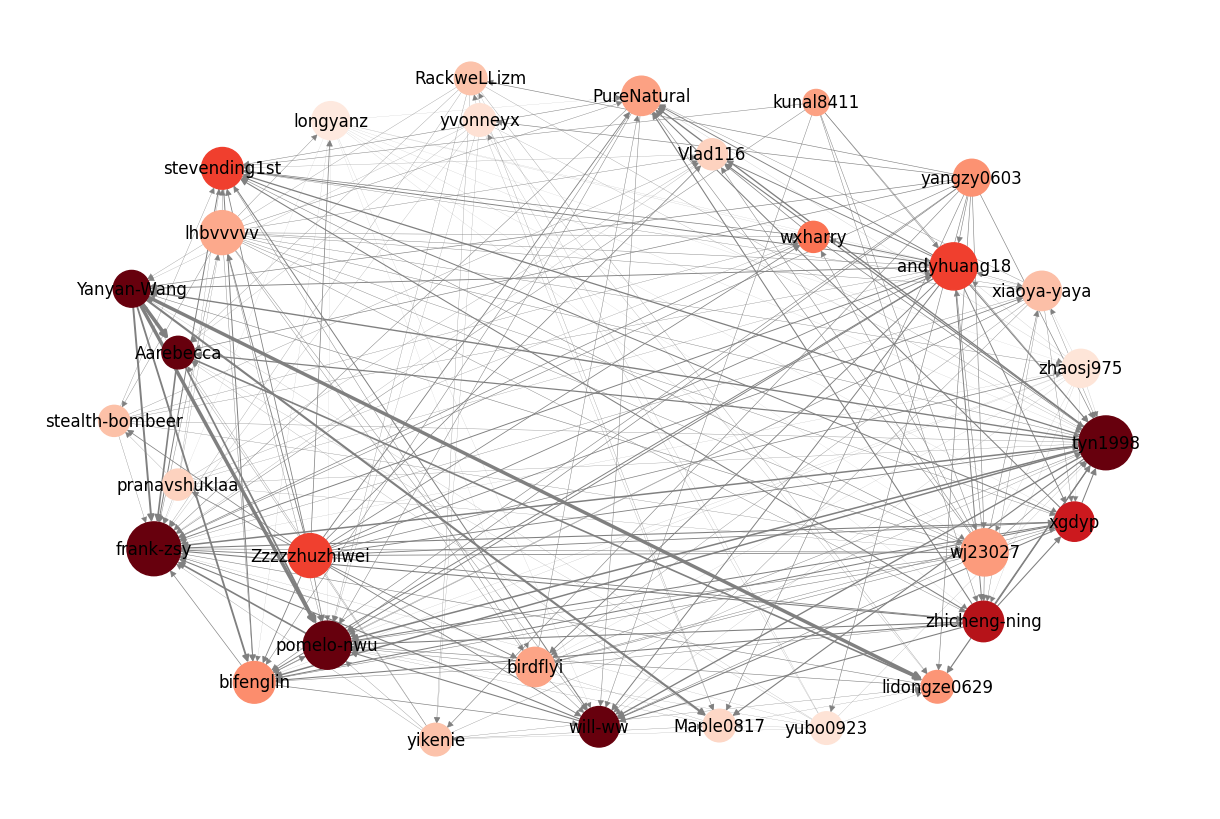

显而易见，越大的节点以及颜色越深的节点，影响力越大


In [77]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
with open("hw4_data.json", "r") as f:
    data = json.load(f)  # nodes edges
# 1······························································································
print("1. 社交网络构建与分析")
#

# a用字典法表示关系网络
print("a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络")
#
p_dic = {}  # {name:[order,inf,degree,score],,[order,inf,degree,score]}
p_friend = {}  # {name:[[firend1,score],,[friendn,score]]}
pp = {}  # {name:[friend1,friend2,...],...}
tmp = 0
for i in data["nodes"]:
    p_dic[i[0]] = [tmp, i[1], 0, 0]
    p_friend[i[0]] = []
    pp[i[0]] = []

    tmp += 1
df = pd.DataFrame(p_dic)
for i in data["edges"]:
    p_friend[i[0]].append([i[1], i[2]])
    p_friend[i[1]].append([i[0], i[2]])
    pp[i[0]].append(i[1])
    pp[i[1]].append(i[0])
print(p_friend)
# b 找出直接朋友，朋友集合就是p_friend,输入人名可以输出朋友名的list
print("b. 请找出所有用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。")
#
def find_friend(p_friend, name):
    p_list = []
    for _ in p_friend[name]:
        p_list.append(_[0])
    return p_list
print(pp)
# 2······························································································
print("2. 统计与度中心性分析")
#
# a最有degree的五个
print(" a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。")
#
for i in p_dic.keys():
    df.loc[2, i] = len(p_friend[i])
    df.loc[3, i] = df[i][2] * 0.5 + df[i][1] * 0.5
df = df.T
df.rename(columns={0: "order", 1: "inf", 2: "degree", 3: "score"}, inplace=True)
df1 = df.sort_values(by="degree", ascending=False).head()
print(df1)
# b最有inf的五个
print("b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。")
#
df2 = df.sort_values(by="inf", ascending=False).head()
print(df2)
# c最有score的五个
print(
    "c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。"
)
#
df3 = df.sort_values(by="score", ascending=False).head(1)
print(df3)
# 3······························································································
print("3. 推荐新朋友")
#
# a朋友的朋友,拥有最多的共同朋友
print(
    "对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（有最多共同的朋友）"
)
#
pp_list = []  # Yanyan-Wang 朋友的朋友
for i in p_friend["Yanyan-Wang"]:
    for j in p_friend[i[0]]:
        if (not ([j[0], 0] in pp_list)) and (j[0] != "Yanyan-Wang"):
            pp_list.append([j[0], 0])
y_friend = find_friend(p_friend, "Yanyan-Wang")  # 调用函数，挑出只有朋友的集合
for i in range(len(pp_list)):
    for j in p_friend[pp_list[i][0]]:
        if j[0] in y_friend:
            pp_list[i][1] += 1
pp_list = sorted(pp_list, key=lambda x: (x[1], x[0]), reverse=True)
print(pp_list[0], pp_list[1], pp_list[2], pp_list[3])  # 第一名，拥有十三个共同朋友


# b 和yanyan-Wang score最高
print(
    "b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。"
)
#
y_friend = p_friend["Yanyan-Wang"]
y_friend = sorted(y_friend, key=lambda x: (x[1], x[0]), reverse=True)
for i in range(5):
    print(y_friend[i], end=" ")
print()
print("推荐排序")
print(y_friend)
# 4······························································································
print("4. 网络图的可视化")
#
# a图论可视化
print("a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。")
print(
    "b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力"
)
#
G = nx.DiGraph()
for node, inf in data["nodes"]:
    G.add_node(node, inf=inf)
for start, end, weight in data["edges"]:
    G.add_edge(start, end)
degrees = dict(df["degree"])
pos = nx.spring_layout(G, k=5, iterations=20)
color_map = []
maxinf = max(inf for _, inf in data["nodes"])
for node in G.nodes():
    color_map.append(plt.cm.Reds((G.nodes[node]["inf"] / maxinf) * 5))
plt.figure(figsize=(12, 8))
nx.draw(
    G,
    pos,
    node_color=color_map,
    node_size=[i * 50 for i in degrees.values()],
    with_labels=True,
    font_weight=400,
    edge_color="grey",
    width=[i[2] / 10 for i in data["edges"]],
)
plt.show()
print("显而易见，越大的节点以及颜色越深的节点，影响力越大")